In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.naive_bayes import BernoulliNB 
import xgboost as xgb

### First Let's load our data.
Starting with the smallest dataset for simplicity

In [13]:
x = np.memmap('data_full/test_binary_data.npy',mode='r', shape = (50000,275*210))
# x = np.load('data/gray_data_20')
y = np.memmap('data/test_target.npy', mode='r', shape = (50000,))
# x_test = np.memmap('data/test_gray_data_360.npy', mode='r', shape = (50000,360))
# y_test = np.memmap('data/test_target.npy', mode='r', shape = (50000))
print(x.shape)
print(y.shape)
x = pd.DataFrame(x)
y = pd.DataFrame(y)
# y = y == 2
# y = y.astype(int)
# y_test = y_test == 2
# y_test = y_test.astype(int)
# x = x/255
# x_test = x_test/255

(50000, 57750)
(50000,)


"target_data": {
"Inco": 2, 
"Teac": 1, 
"Cons": 0, 
"Publ": 4, 
"Econ": 3}}

In [14]:
X_train, x_test, y_train, y_test = train_test_split(x, y[0], test_size=0.4, stratify=y)
print(X_train.shape)
print(y_test.shape)

(30000, 57750)
(20000,)


In [17]:
X_train[-10:]

,0,1,2,3,4,5,6,7,8,9,...,57740,57741,57742,57743,57744,57745,57746,57747,57748,57749
3567,1,0,1,1,1,1,0,1,0,1,...,1,1,1,1,1,1,1,1,1,1
40614,1,1,1,1,1,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
21837,1,1,1,0,0,0,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
5717,0,1,1,1,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
36659,1,1,0,0,0,1,1,0,0,0,...,0,1,1,1,0,0,0,1,1,1
5350,0,1,1,1,1,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
32415,1,1,1,1,1,0,0,0,1,1,...,1,0,0,1,0,0,0,1,1,1
25620,1,1,1,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
38928,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14874,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,0,1,1,1,0


In [16]:
chunk = 1000
for i in range(X_train.shape[0]//chunk):
    X_train[i*chunk:(i+1)*chunk] = X_train[i*chunk:(i+1)*chunk]/255
for i in range(x_test.shape[0]//chunk):
    x_test[i*chunk:(i+1)*chunk] = x_test[i*chunk:(i+1)*chunk]/255

## Naive Bayes

~~~
Accuracy:	0.2025
Precision:	0.2025738072573832
Recall:	0.20249999999999999
F1:	0.20229736964345638
array([[2208, 2007, 1772, 2025, 1988],
       [2150, 2057, 1745, 2094, 1954],
       [2183, 1989, 1815, 2045, 1968],
       [2207, 2052, 1764, 2063, 1914],
       [2219, 1989, 1775, 2035, 1982]])
~~~

In [19]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(x_test,)
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred, average="macro")}')
confusion_matrix(y_test, y_pred)

: 

: 

## Ensemble of Models

~~~
Accuracy:	0.2025
Precision:	0.2025738072573832
Recall:	0.20249999999999999
F1:	0.20229736964345638
array([[2208, 2007, 1772, 2025, 1988],
       [2150, 2057, 1745, 2094, 1954],
       [2183, 1989, 1815, 2045, 1968],
       [2207, 2052, 1764, 2063, 1914],
       [2219, 1989, 1775, 2035, 1982]])
~~~

In [16]:
# create voting classifier
model_list = [
    ('knn', knn),
    ('lr', lr),
    ('dt', dt),
    ('rf', rf),
    ('nb', gnb)
]
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)
y_pred = voting_classifer.predict(x_test)
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred, average="macro")}')
confusion_matrix(y_test, y_pred)


Accuracy:	0.80428
Precision:	0.8971443935927617
Recall:	0.510775
F1:	0.4666404916100489


array([[39998,     2],
       [ 9784,   216]])

In [17]:

voting_classifer2 = VotingClassifier(estimators=model_list,
                                    voting='soft', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer2.fit(X_train, y_train)
y_pred = voting_classifer2.predict(x_test)
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred, average="macro")}')
confusion_matrix(y_test, y_pred)


Accuracy:	0.80568
Precision:	0.8530646696122672
Recall:	0.5155125
F1:	0.4766184202795973


array([[39965,    35],
       [ 9681,   319]])

In [45]:
model_list = [knn,lr,dt,rf]
stacked = StackingClassifier(
    classifiers=model_list, meta_classifier=LogisticRegression(n_jobs=-1), use_probas=False)
stacked.fit(X_train, y_train)
y_pred = stacked.predict(x_test)
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred, average="macro")}')
confusion_matrix(y_test, y_pred)

/home/patrick/anaconda3/envs/classification/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:	0.20942
Precision:	0.21746255034331302
Recall:	0.20942
F1:	0.19530824327728674


array([[1030, 2684, 3488, 2215,  583],
       [ 950, 2696, 3513, 2222,  619],
       [ 868, 2793, 3491, 2244,  604],
       [ 853, 2554, 3457, 2460,  676],
       [ 826, 2532, 3486, 2362,  794]])

### More Evaluation


In [18]:
y_pred = voting_classifer2.predict_proba(x_test)

Text(0.5, 1.0, 'Precision and Recall Curves')

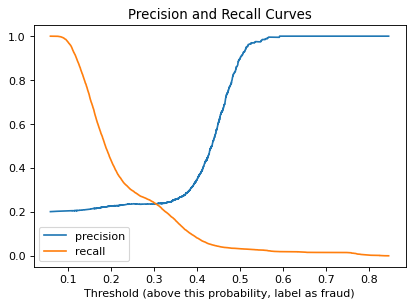

In [26]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, y_pred[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)')
plt.title('Precision and Recall Curves')

In [32]:
y_pred2 = y_pred[:,1]>0.3

print(f'Accuracy:\t{accuracy_score(y_test, y_pred2)}')
print(f'Precision:\t{precision_score(y_test, y_pred2, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred2, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred2, average="macro")}')
confusion_matrix(y_test, y_pred2)

Accuracy:	0.69186
Precision:	0.5224424924588862
Recall:	0.522825
F1:	0.5226151458480693


array([[32182,  7818],
       [ 7589,  2411]])